##<center>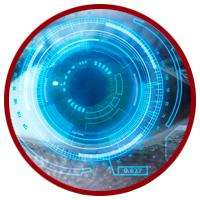 **Computer Vision Counting total rice grain and broken rice grain project**<center/>

---



#### **1. Problem Statement**
This Notebook solve to aim two objective discuss both objective in brief below.
 
* ***Objective 1 :*** Count the total Number of rice grain present in images 
*   ***Objective 2 :*** Find how many broken rice grains present in images and  count the frequency of broken rice grains .

Technology used:  Computer Vision, OpenCv for reading and showing image, WaterShed Algorithm for segregate the images for counting , Image Preprocessing(Morphological Operation), Image Segmentation(differentiate broken rice and complete rice grain using distance ), and others.

The Approach of the objectives are well understandable and have clear Visualization for better Insights into the working of each notebook cell.


\
I hope you will love the approach and the presentation of the solution i try to expain all the thing in very intuitive way But I truely say scope of improvement always be a part of getting optimistic result so please anywhere if you think about improvement freely part of colloboration in this notebook.



**Regards,\
Madhur Sharma**



### **Significant Information about Image**

*   All image backgroung in blue clour
*   In images there will be combination of broken and non-broken rice grain 
*   The rice grains will not overlap but they touch to each other .



## **<center> Steps taken for complete Objective 1 <center/>**

---



1. **Importing all the Necessary Libraries**
2. **Creating Function for visualization**
  *  Defining custom "show" function for Image Visualization
2. **Image Pre-Processing**
  * convert RGB Image to Grayscale Image
  * Image Thresholding for converting the RGB pixel value to Grayscale pixel (0 to 256)
  * Morphological Transformations Like open and close  (Noise Removal)
3. **Counting rice grains using the Contours method**
  * Working over Clear image to get insight into grain touching problem
3. **Applying Watershed Algorithm :** use watershed algorithm for solving grains touching problem
  * Applying Watershed Algorithm for Solving Touching rice grains problem
  
4. **Counting total Rice grains and Broken Rice grains using the contour area**
  * For total rice grains counting: the Watershed method
  * For broken rice grains counting: A filter of an average area of broken rice grain using the length of rice .

#### **Approach for Solve Problem**

* The main idea to solve the obective objectives (conting rice grains) is processing the image in the best possible format .  

*  The two important thing for this objective first one is clarity in image amd second one is rice grains are well separated from the background image if we would achieve these two thing so it woukd be ease in counting them.

* Then , solving the corner cases and hence building the solution


**There are total 3 major challanging parts in building solutions:**

1. Image processing 
2. Solving Grains touching Problem 
3. couting broken rice is challenging task because there will be length based approach used 

##### We will look forward how to overcome these challenging steps

#### **Explain all the challenge in brief**

**1.Image processing**

Image Processing play important role to solve this objective  , on this itself , whole ideology relies.

if we successfully tuned the image as per the needs then it become easy to work further with approaches 

As part of solution , i follow the approach 
* Converting the BGR image to Grayscale image 
* set the thresholding for conversion the image 
And Removing Noise from the thresholded image using morphological image (open-(dilation followed by erosion))

After all the image processing , the clear image for ready to counting using counter function .

**2. Solution for grains touching problem**

It is not easy for human eye in manual inspection process to count the rice rice grains because the small size of rice grain and white color are not able to give clear interpretation.

but for machine perspective counting rice are quite easy task if they are well segregated with backgrond clearity . the reason , is there are lots of algorithm available for counting the object in image that can come in help

But anopther hurdles for counting is object touching or overlapping level because off this algorithm counted object touching as 1 rice grains so,we have to do lot of efforts in grains classification

In our case it become more difficult as the rice grains are quite in size 

So , for solving this i use watershed algorithm.

WaterSheld Algorithm is based on extracting sure background and foreground and then using markers will make the watershed algorithm run and detect the exact boundaries.


 **3. counting broken rice :**

 After implement Watersheld algorithm, We will get the total number of rice present in the image, but counting broken rice grains are another Challenge.

I used an area-based approach, where I put a threshold after several trail and errors that helps in classifying the rice grains into two categories.
**Either Broken rice grain or Full rice grain**. 

If the area of the Image is below the provided threshold then it is counted in the broken rice category.

Thus with this, we are done with the solutions of both of the objectives .\
Well.

 ### **<center>Here coading parts start** 

###**Import all the necessary library**

In [2]:
# Importing openCv both as cv2 and cv for read and show the images
import cv2
import cv2 as cv

# Importing numpy dor dealing with n dimensional array
import numpy as np 

# Importing matplotlib for image visualization
import matplotlib.pyplot as plt

# cv2.iamshow method is not supported in collab so we importing cv2.iamshow explicitely using goole.colab.patches 
from google.colab.patches import cv2_imshow 

# Importing PIL library for working with images
!pip install PIL
from PIL import Image

# for read and show images using matplotlib use mpimg
import matplotlib.image as mpimg

# import ndimage from scipy this package useful for various function for multidimensional image processing
from scipy import ndimage

# import asarray method from numpy for dealing with pixels of images
from numpy import asarray

#import color ,filter,measure  and feature from skimage 
from skimage import color , filters , measure ,  feature

# Import watershed for touching Grains sepration
from skimage.segmentation import watershed 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


###**2. Creating function for display image**

Defining function so we can use repeatedly going task to be use in further steps

In [3]:
#Defining show function for displaying image with custom X and Y cordinates
def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

###**3.Image pre-Processing**

Image preprocessing is one of the crucial step in computer vision task .The purpose of doing pre-processing is to improve the quality of image so it can analysed in a better way by processing we can remove undesired noise and enhance some features which are important for the particular purpose .


In [4]:
#Defining show function for displaying image with custom X and Y cordinates

def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)


first image
second image
Third image
fourth image
fifth image
respectively


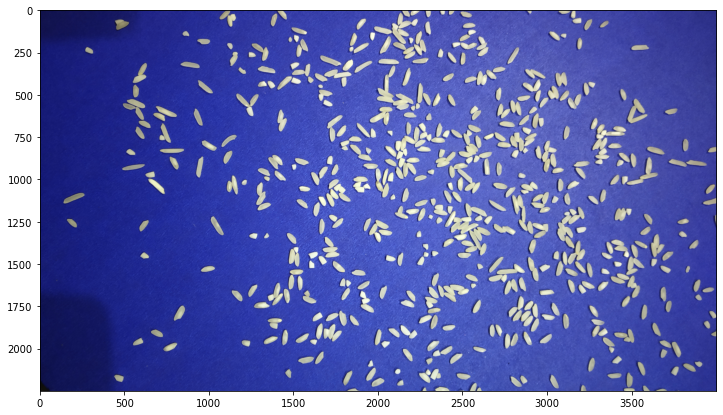

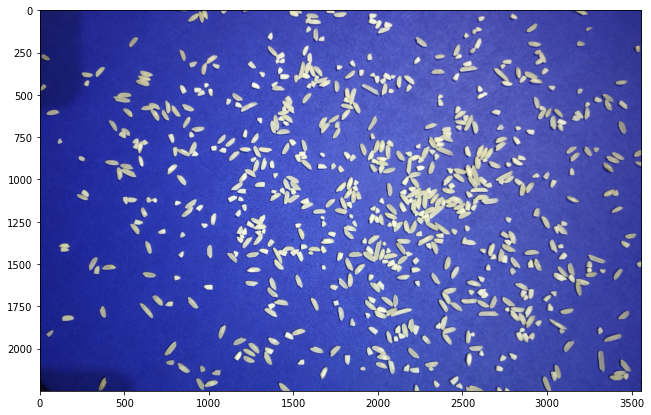

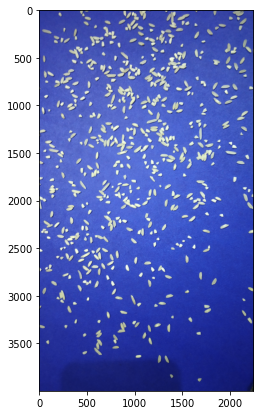

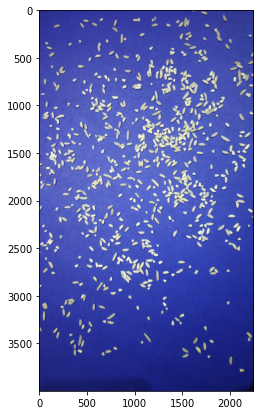

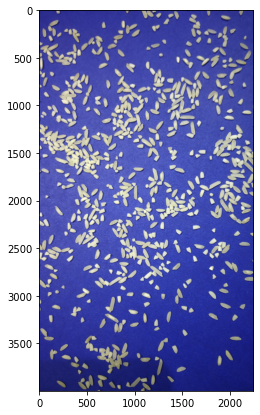

In [5]:
image1 = cv2.imread("//content/drive/MyDrive/Datasets/Akaike Assignment/Computer_vision Assignment/data/data/test/image_1.jpg")
image2 = cv2.imread("/content/drive/MyDrive/Datasets/Akaike Assignment/Computer_vision Assignment/data/data/test/image_2.jpg")
image3 = cv2.imread("/content/drive/MyDrive/Datasets/Akaike Assignment/Computer_vision Assignment/data/data/test/image_3.jpg")
image4 = cv2.imread("/content/drive/MyDrive/Datasets/Akaike Assignment/Computer_vision Assignment/data/data/test/image_4.jpg")
image5 = cv2.imread("/content/drive/MyDrive/Datasets/Akaike Assignment/Computer_vision Assignment/data/data/test/image_5.jpg")

#Using predefined show function for displaying the image
print("first image")
show(image1,35,7)


print("second image")
show(image2,35,7)


print("Third image")
show(image3,35,7)


print("fourth image")
show(image4,35,7)

print("fifth image")
print("respectively")
show(image5,35,7)


#### **Converting image into grayscale and then image  thresholding  using ostu's threshold**

The first step in image pre-processing in which we convert the image into grayscale where pixel intensity ranges between 0 to 255 and then apply threshold function the cv2.threshold() to separate the pixel into foreground and backgroung areas 

**Function for creating Histogram of images**

In [58]:
def histo(im):
 temp=np.zeros((np.shape(im)[0],np.shape(im)[1]))
 plt.subplots(figsize=(15, 2))
 plt.subplot(1, 2, 1)
 plt.imshow(im,cmap='gray')
 
 plt.subplot(1,2, 2)
 freq=np.zeros((256,1))
 total=np.shape(im)[0]*(np.shape(im)[1])
 for i in range(0,np.shape(im)[0]):
  for j in range(0,np.shape(im)[1]):
   freq[im[i][j]]=freq[im[i][j]]+1;
 max_val=np.max(freq)
 peak=0
 at=0
 for i in range(0,256):
  if (freq[i]==max_val):
   at=i
   peak=peak+1;
 x_a=np.arange(256)
 plt.plot(x_a, freq)
 plt.xlabel('Intensity')
 plt.ylabel('Frequency')
 plt.title('Histogram')
 plt.show(block=True)
 print("Peak value of Histogram at intensity = ",at)
 if peak==1:
  print("Modality of Histogram is 1, Unimodal\n")
 elif peak==2:
  print("Modality of Histogram is 2, Bimodal\n")
 else :
  print("Modality of Histogram is ",peak,", Multimodal\n")
print("Histogram of Rice grain image")

Histogram of Rice grain image


**First image preprocessing**

first image preprocessing
BGR_to_grayscale
threshold_image
clear image after open operation
respectively


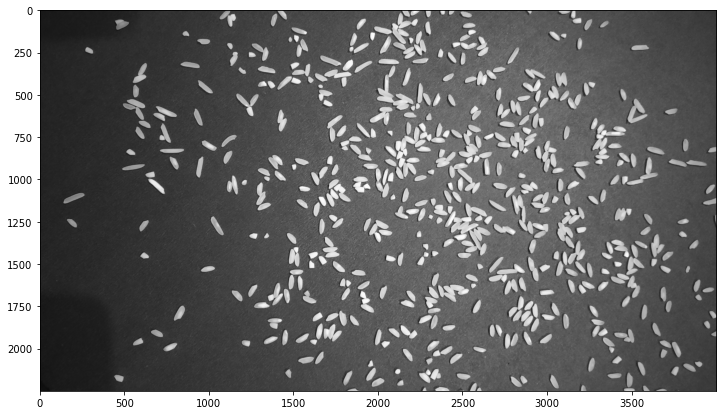

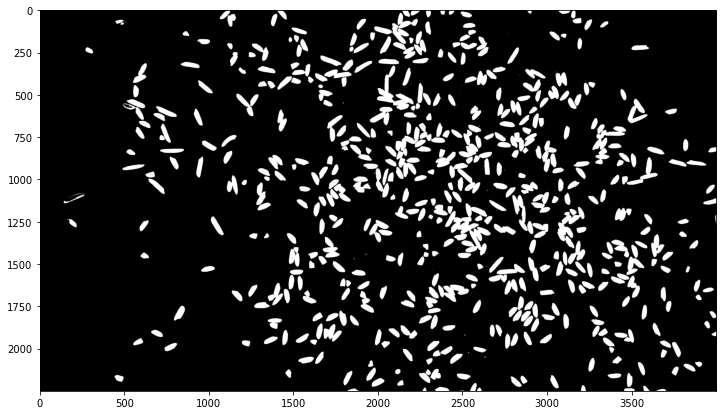

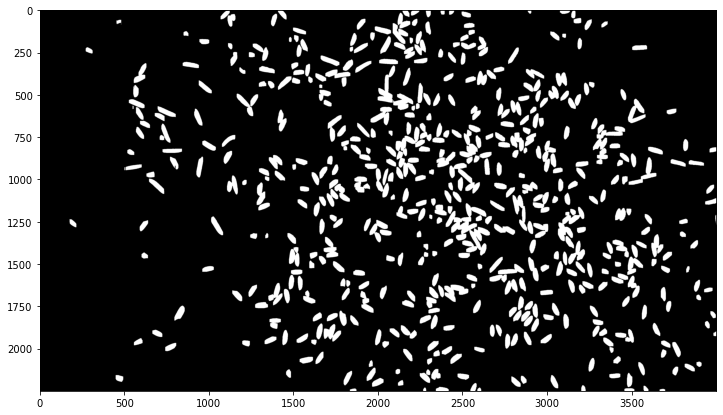

In [6]:
#convert image BGR image to grayscale image for image thresholding and rest of the image processing task 
#function for doing pre-processing steps 
print('first image preprocessing')
BGR_to_grayscale = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
print('BGR_to_grayscale')
show(BGR_to_grayscale )
ret , threshold_image = cv2.threshold(BGR_to_grayscale ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print("threshold_image")
show(threshold_image)
#Noise removal with open binary morphological operation where we do erosion followed by dilation 
Structuring_element = np.ones((3),np.uint8)
clear_image1 = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, Structuring_element, iterations=8)
print("clear image after open operation")
print("respectively")
show(clear_image1)



### **Plotting the histogram of image1**

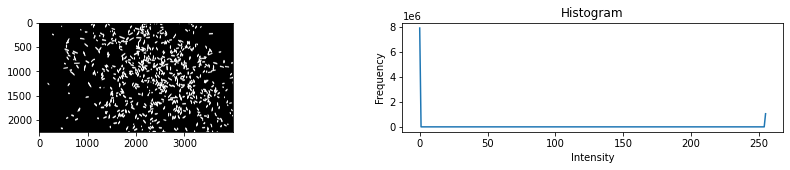

Peak value of Histogram at intensity =  0
Modality of Histogram is 1, Unimodal



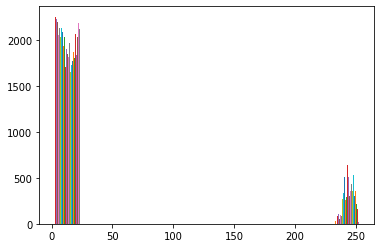

In [59]:
histo(clear_image1)
plt.hist(clear_image1)
plt.show()

**Second image preprocessing**

second image preprocessing
BGR_to_grayscale
threshold_image
clear image after open operation
respectively


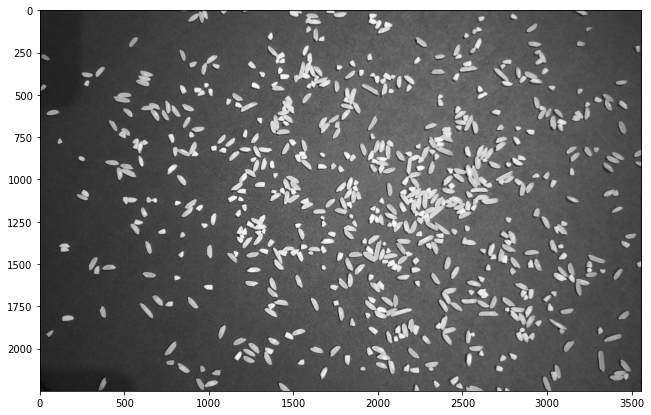

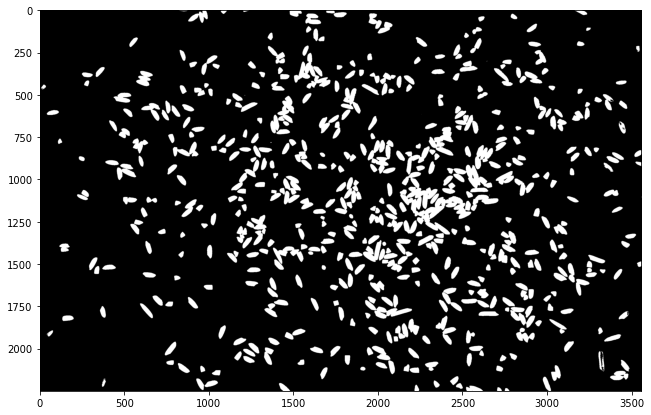

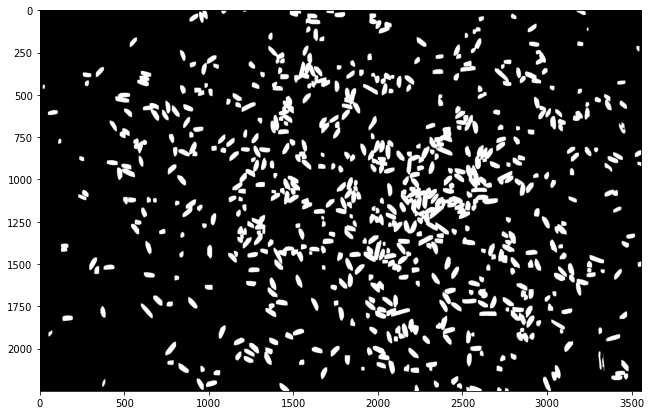

In [7]:
#convert image BGR image to grayscale image for image thresholding and rest of the image processing task 
#function for doing pre-processing steps 
print('second image preprocessing')
BGR_to_grayscale = cv2.cvtColor(image2 , cv2.COLOR_BGR2GRAY)
print('BGR_to_grayscale')
show(BGR_to_grayscale )
ret , threshold_image = cv2.threshold(BGR_to_grayscale ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print("threshold_image")
show(threshold_image)
#Noise removal with open binary morphological operation where we do erosion followed by dilation 
Structuring_element = np.ones((3),np.uint8)
clear_image2 = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, Structuring_element, iterations=8)
print("clear image after open operation")
print("respectively")
show(clear_image2)

### **Plotting the Histogram of image2**

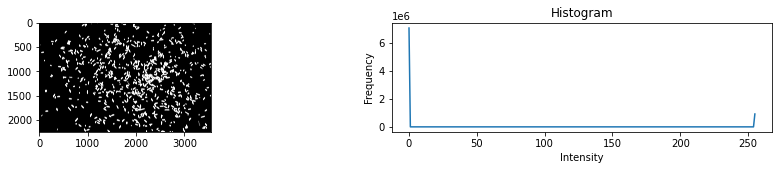

Peak value of Histogram at intensity =  0
Modality of Histogram is 1, Unimodal



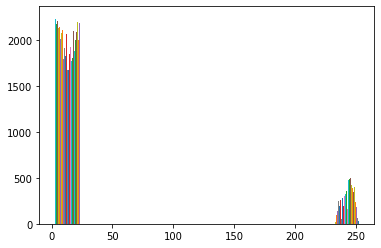

In [64]:
histo(clear_image2)
plt.hist(clear_image2)
plt.show()

**Third image preprocessing**

Third image preprocessing
BGR_to_grayscale
threshold_image
clear image after open operation
respectively


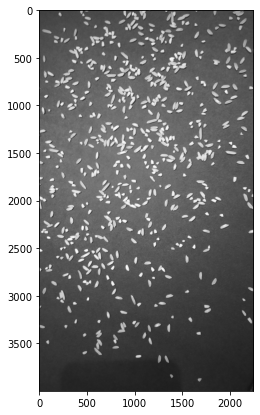

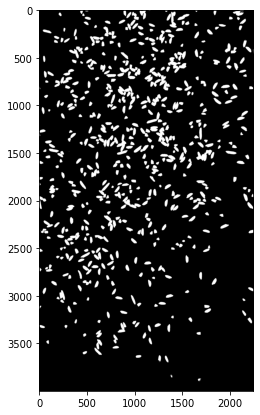

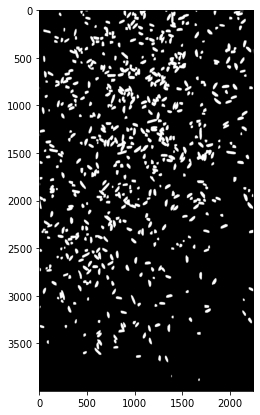

In [8]:
#convert image BGR image to grayscale image for image thresholding and rest of the image processing task 
#function for doing pre-processing steps 
print('Third image preprocessing')
BGR_to_grayscale = cv2.cvtColor(image3 , cv2.COLOR_BGR2GRAY)
print('BGR_to_grayscale')
show(BGR_to_grayscale )
ret , threshold_image = cv2.threshold(BGR_to_grayscale ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print("threshold_image")
show(threshold_image)
#Noise removal with open binary morphological operation where we do erosion followed by dilation 
Structuring_element = np.ones((3),np.uint8)
clear_image3 = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, Structuring_element, iterations=8)
print("clear image after open operation")
print("respectively")
show(clear_image3)

### **Plotting the histogram for image3**

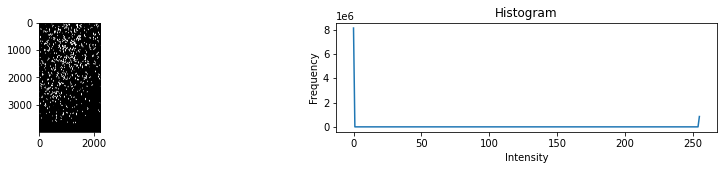

Peak value of Histogram at intensity =  0
Modality of Histogram is 1, Unimodal



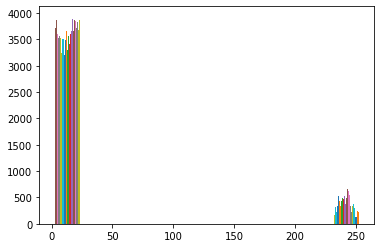

In [65]:
histo(clear_image3)
plt.hist(clear_image3)
plt.show()

**Fourth image preprocessing**

Fouth image preprocessing
BGR_to_grayscale
threshold_image
clear image after open operation
respectively


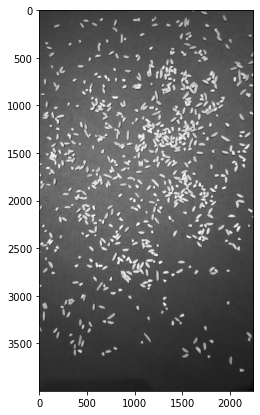

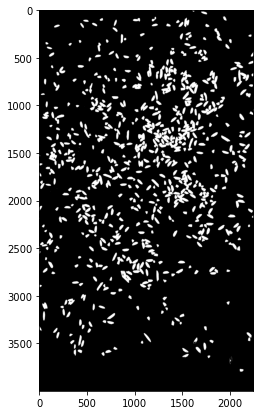

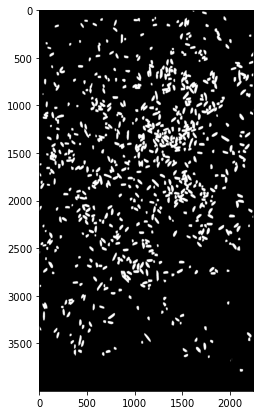

In [9]:
#convert image BGR image to grayscale image for image thresholding and rest of the image processing task 
#function for doing pre-processing steps 
print('Fouth image preprocessing')
BGR_to_grayscale = cv2.cvtColor(image4 , cv2.COLOR_BGR2GRAY)
print('BGR_to_grayscale')
show(BGR_to_grayscale )
ret , threshold_image = cv2.threshold(BGR_to_grayscale ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print("threshold_image")
show(threshold_image)
#Noise removal with open binary morphological operation where we do erosion followed by dilation 
Structuring_element = np.ones((3),np.uint8)
clear_image4 = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, Structuring_element, iterations=8)
print("clear image after open operation")
print("respectively")
show(clear_image4)

### **Plotting the histogram for image4**

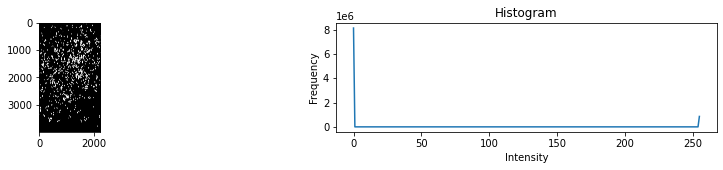

Peak value of Histogram at intensity =  0
Modality of Histogram is 1, Unimodal



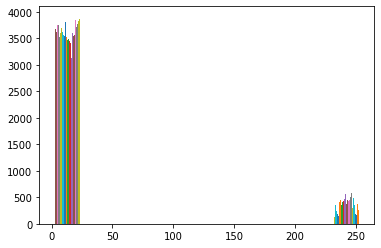

In [66]:
histo(clear_image4)
plt.hist(clear_image4)
plt.show()

**Fifth image preprocessing**

fifth image preprocessing
BGR_to_grayscale
threshold_image
clear image after open operation
respectively


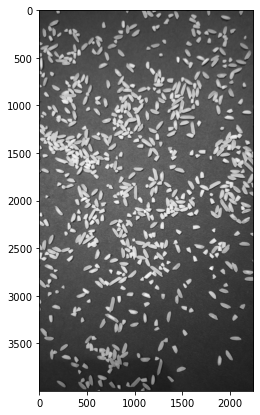

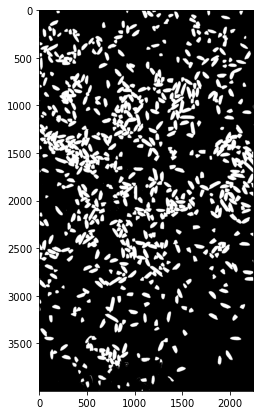

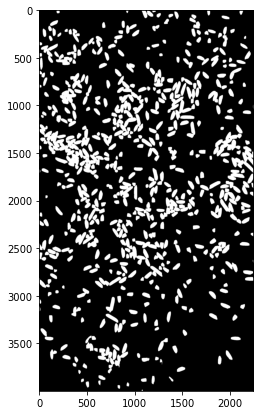

In [10]:
#convert image BGR image to grayscale image for image thresholding and rest of the image processing task 
#function for doing pre-processing steps 
print('fifth image preprocessing')
BGR_to_grayscale = cv2.cvtColor(image5 , cv2.COLOR_BGR2GRAY)
print('BGR_to_grayscale')
show(BGR_to_grayscale )
ret , threshold_image = cv2.threshold(BGR_to_grayscale ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print("threshold_image")
show(threshold_image)
#Noise removal with open binary morphological operation where we do erosion followed by dilation 
Structuring_element = np.ones((3),np.uint8)
clear_image5 = cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN, Structuring_element, iterations=8)
print("clear image after open operation")
print("respectively")
show(clear_image5)

### **Plotting the histogram for image5**

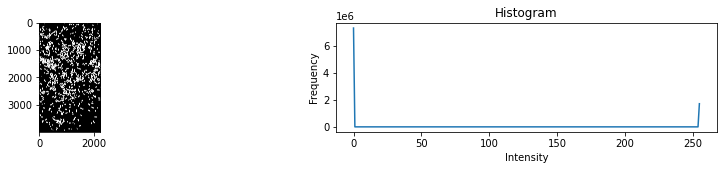

Peak value of Histogram at intensity =  0
Modality of Histogram is 1, Unimodal



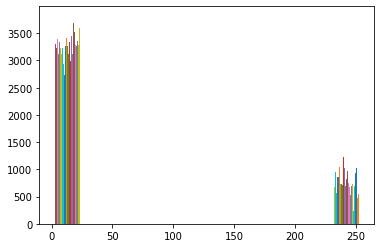

In [67]:
histo(clear_image5)
plt.hist(clear_image5)
plt.show()

**Counting the labels**

In [11]:
#Copying the preprocessed image as label_image
label_image1 = clear_image1.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count1 = 0

#Shape function for getting height and width
rows, cols = label_image1.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image1[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count1 += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image1, None, (i, j), label_count1)


Number of foreground objects 491843


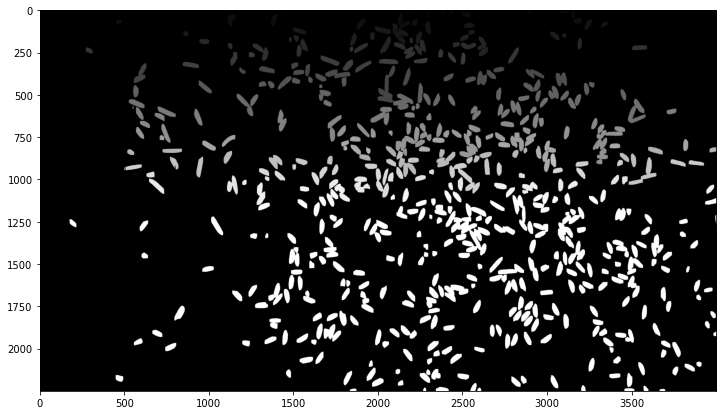

In [12]:
print("Number of foreground objects", label_count1)
show(label_image1)

In [13]:
#Copying the preprocessed image as label_image
label_image2 = clear_image2.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count2 = 0

#Shape function for getting height and width
rows, cols = label_image2.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image2[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count2 += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image2, None, (i, j), label_count2)

Number of foreground objects 407814


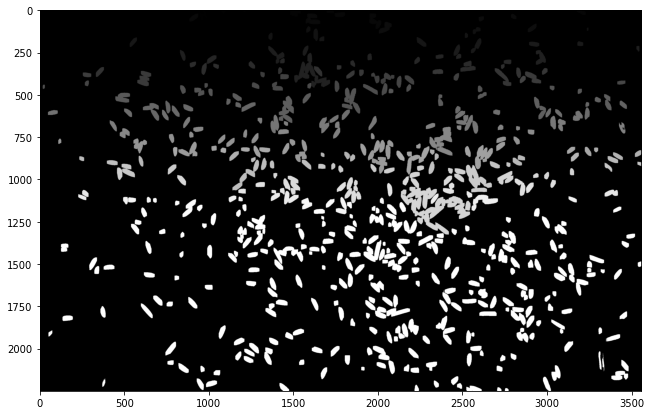

In [14]:
print("Number of foreground objects", label_count2)
show(label_image2)

In [15]:
#Copying the preprocessed image as label_image
label_image3 = clear_image3.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count3 = 0

#Shape function for getting height and width
rows, cols = label_image3.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image3[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count3 += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image3, None, (i, j), label_count3)

Number of foreground objects 409483


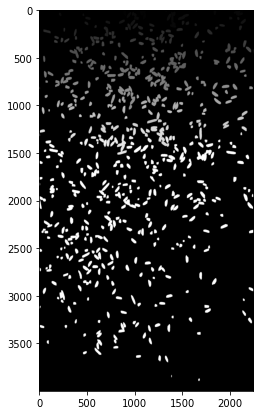

In [16]:
print("Number of foreground objects", label_count3)
show(label_image3)

In [17]:
#Copying the preprocessed image as label_image
label_image4 = clear_image4.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count4 = 0

#Shape function for getting height and width
rows, cols = label_image4.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image4[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count4 += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image4, None, (i, j), label_count4)

Number of foreground objects 457161


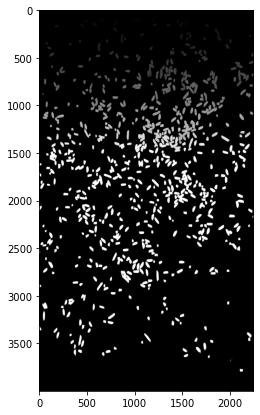

In [18]:
print("Number of foreground objects", label_count4)
show(label_image4)

In [19]:
#Copying the preprocessed image as label_image
label_image5 = clear_image5.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count5 = 0

#Shape function for getting height and width
rows, cols = label_image5.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image5[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count5 += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image5, None, (i, j), label_count5)

Number of foreground objects 665599


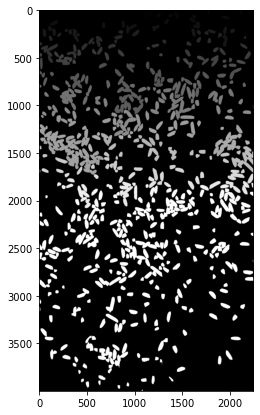

In [20]:
print("Number of foreground objects", label_count5)
show(label_image5)

### **4. Counting rice grains using Contours method**


use Opencv Contour method for counting the total number of rice grains present in the image. 

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [21]:
#Applying Countours method to get the count of rice grains of image 1
contours1, hierarchy = cv.findContours(clear_image1, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour1 = cv.cvtColor(clear_image1, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour1, contours1, -1, (0, 0, 255), 2)
print("Number of detected contours in image 1", len(contours1))

Number of detected contours in image 1 498


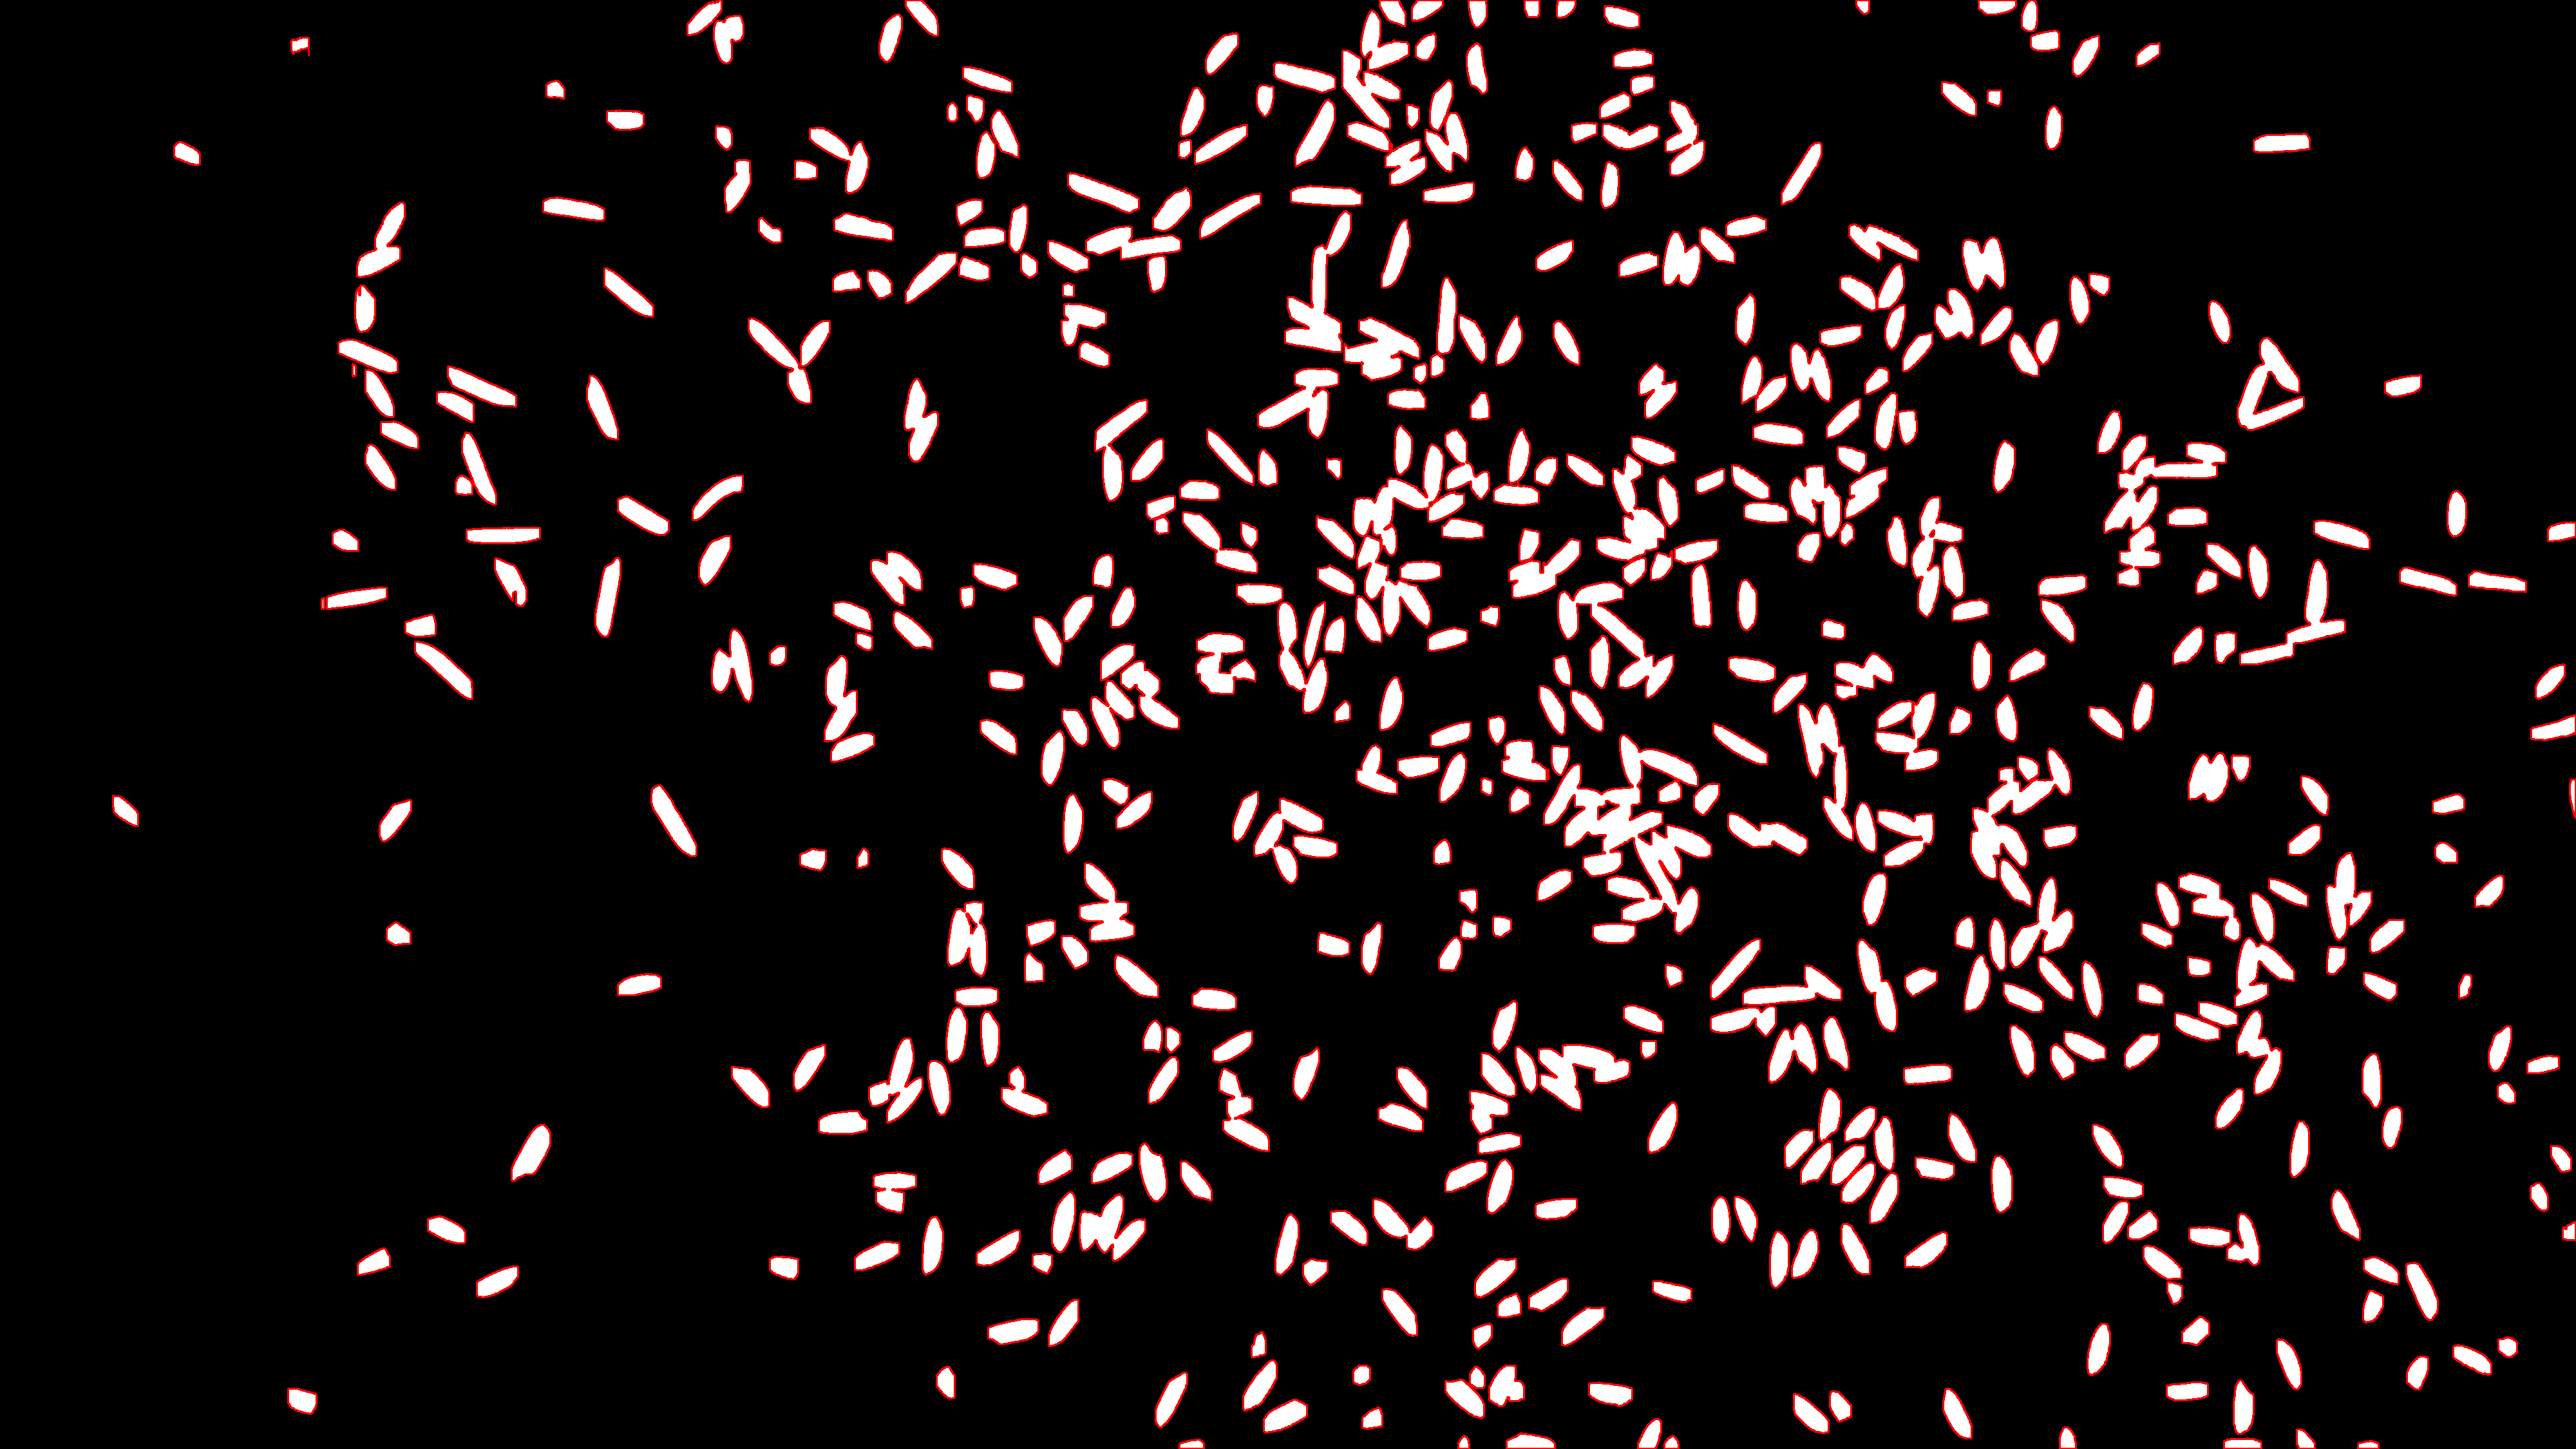

In [22]:
cv2_imshow(output_contour1)
plt.show()

In [23]:
#Applying Countours method to get the count of rice grains of image 2
contours2, hierarchy = cv.findContours(clear_image2, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour2 = cv.cvtColor(clear_image2, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour2, contours2, -1, (0, 0, 255), 2)
print("Number of detected contours in image 2", len(contours2))

Number of detected contours in image 2 516


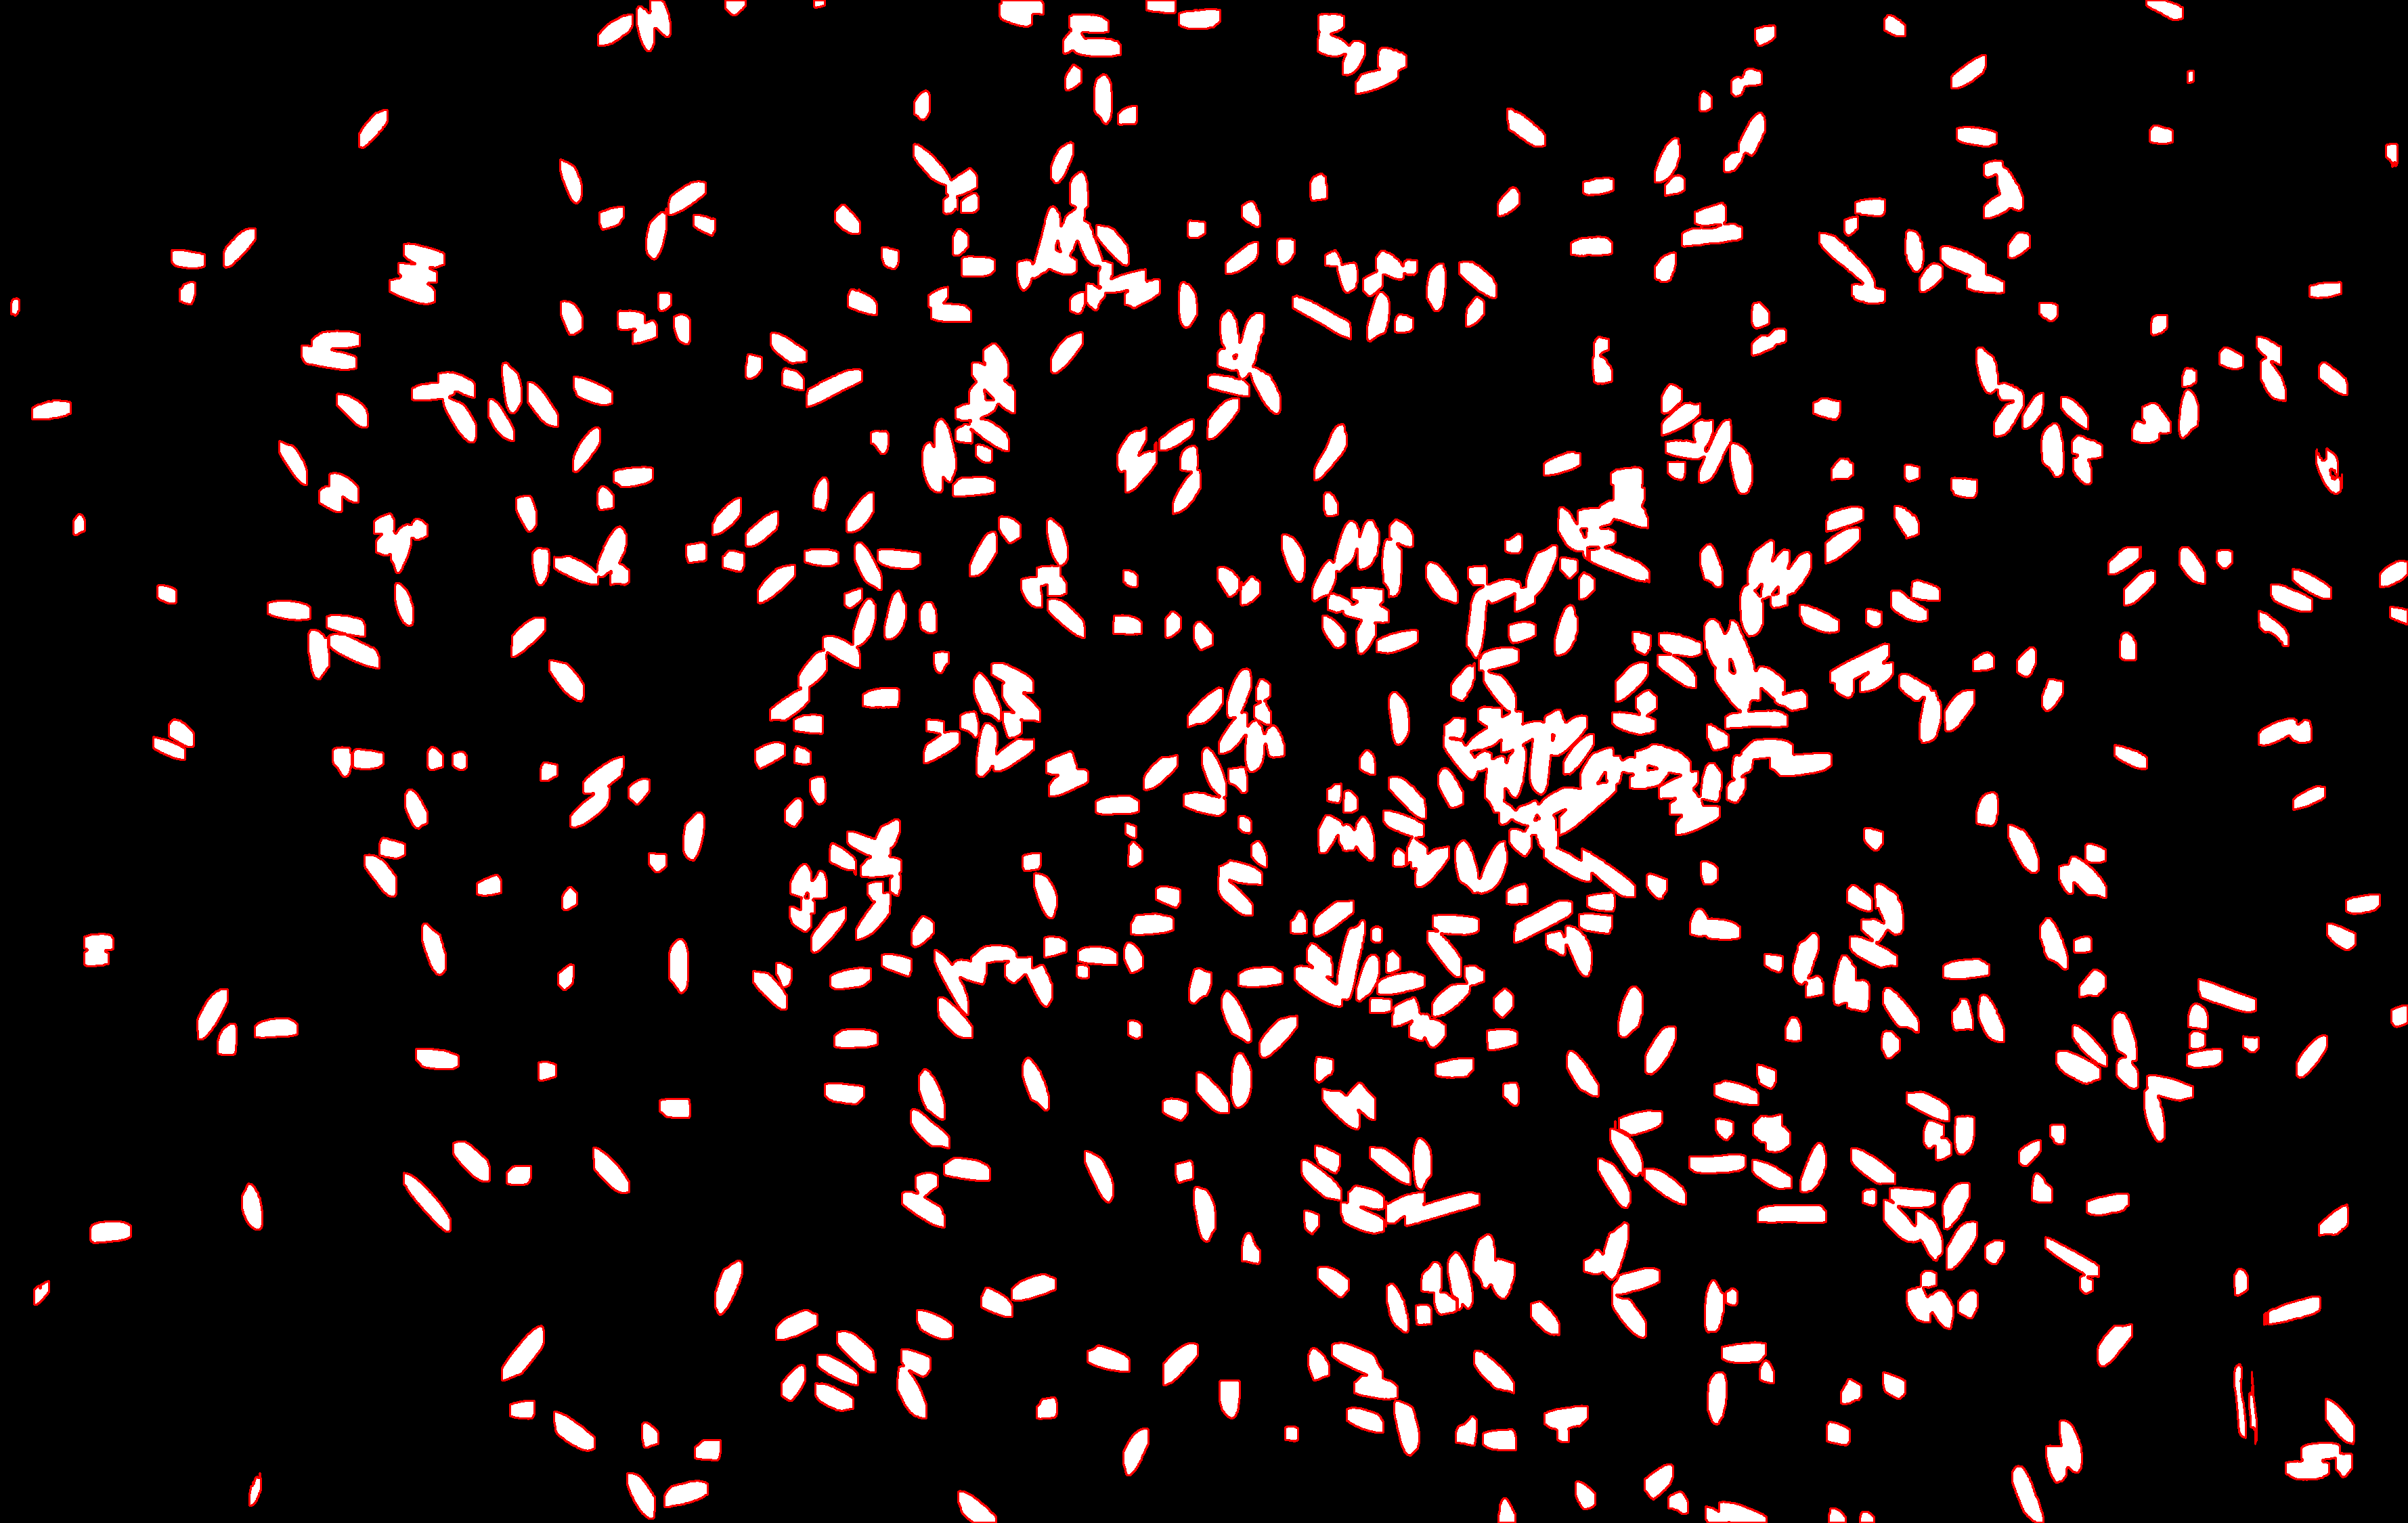

In [24]:
cv2_imshow(output_contour2)
plt.show()

In [25]:
#Applying Countours method to get the count of rice grains of image 3
contours3, hierarchy = cv.findContours(clear_image3, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour3 = cv.cvtColor(clear_image3, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour3, contours3, -1, (0, 0, 255), 2)
print("Number of detected contours in image 3", len(contours3))

Number of detected contours in image 3 534


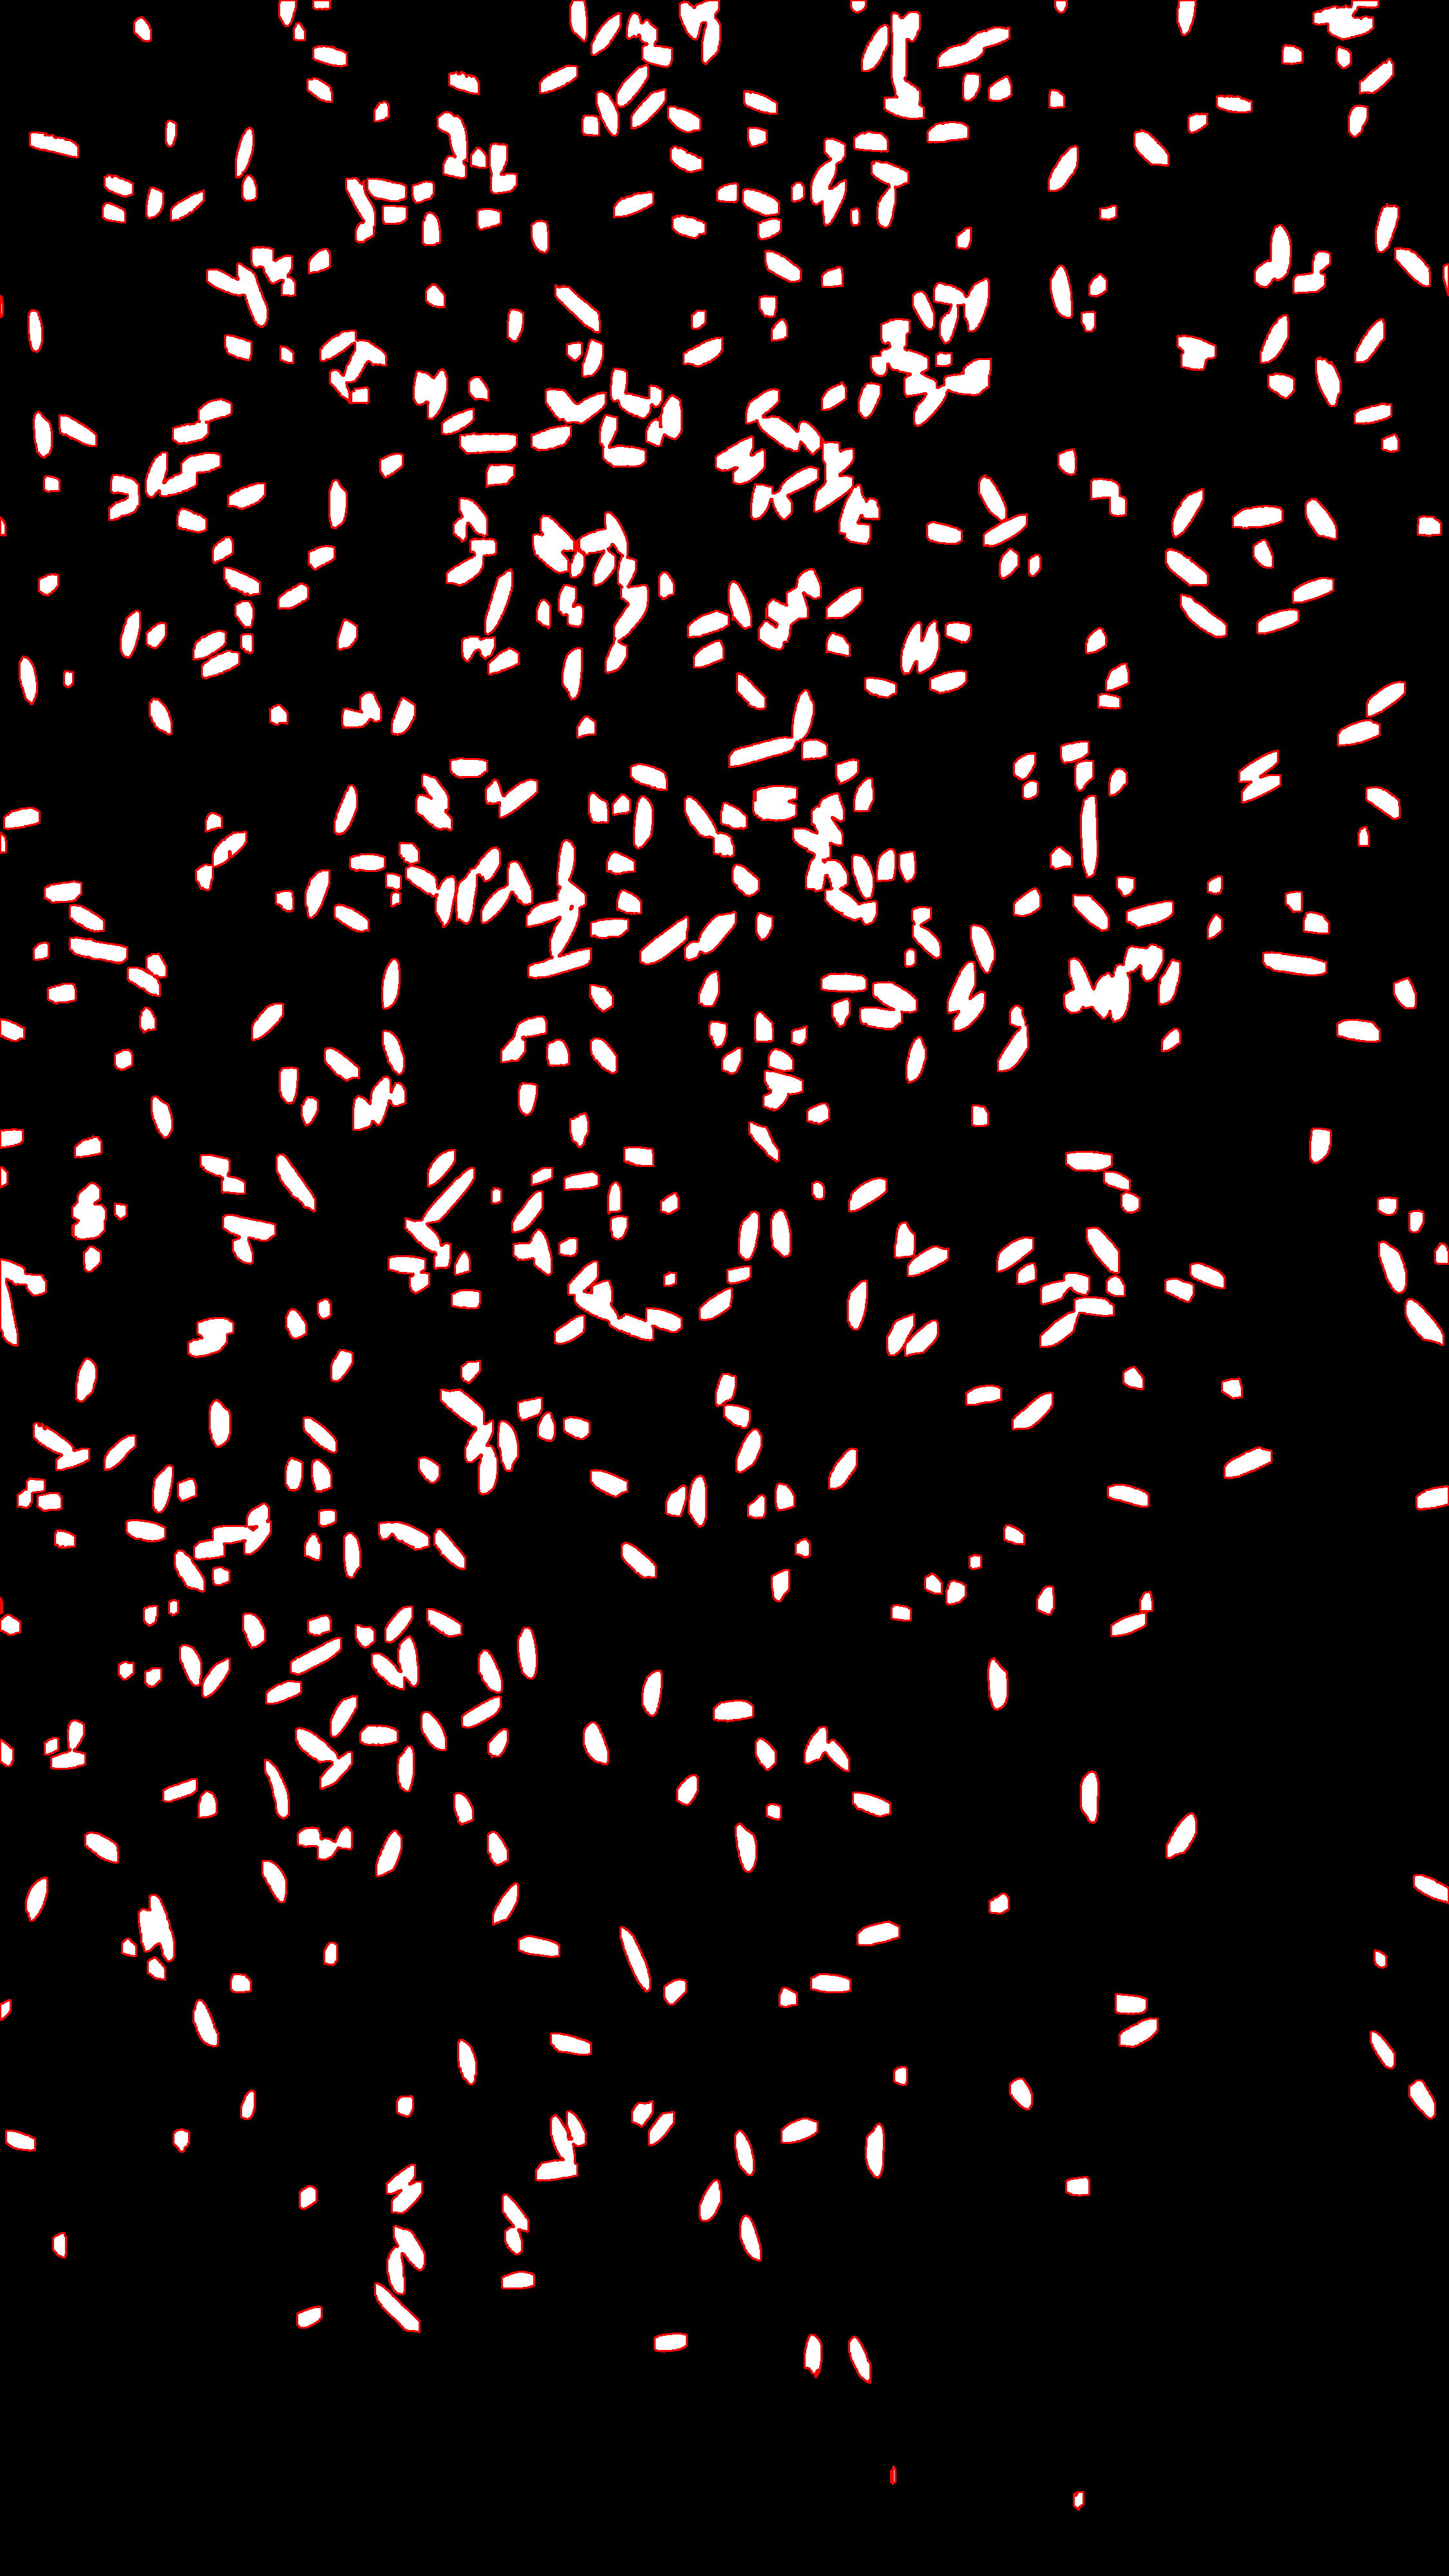

In [26]:
cv2_imshow(output_contour3)
plt.show()

In [27]:
#Applying Countours method to get the count of rice grains of image 4
contours4, hierarchy = cv.findContours(clear_image4, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour4 = cv.cvtColor(clear_image4, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour3, contours4, -1, (0, 0, 255), 2)
print("Number of detected contours in image 4", len(contours4))

Number of detected contours in image 4 623


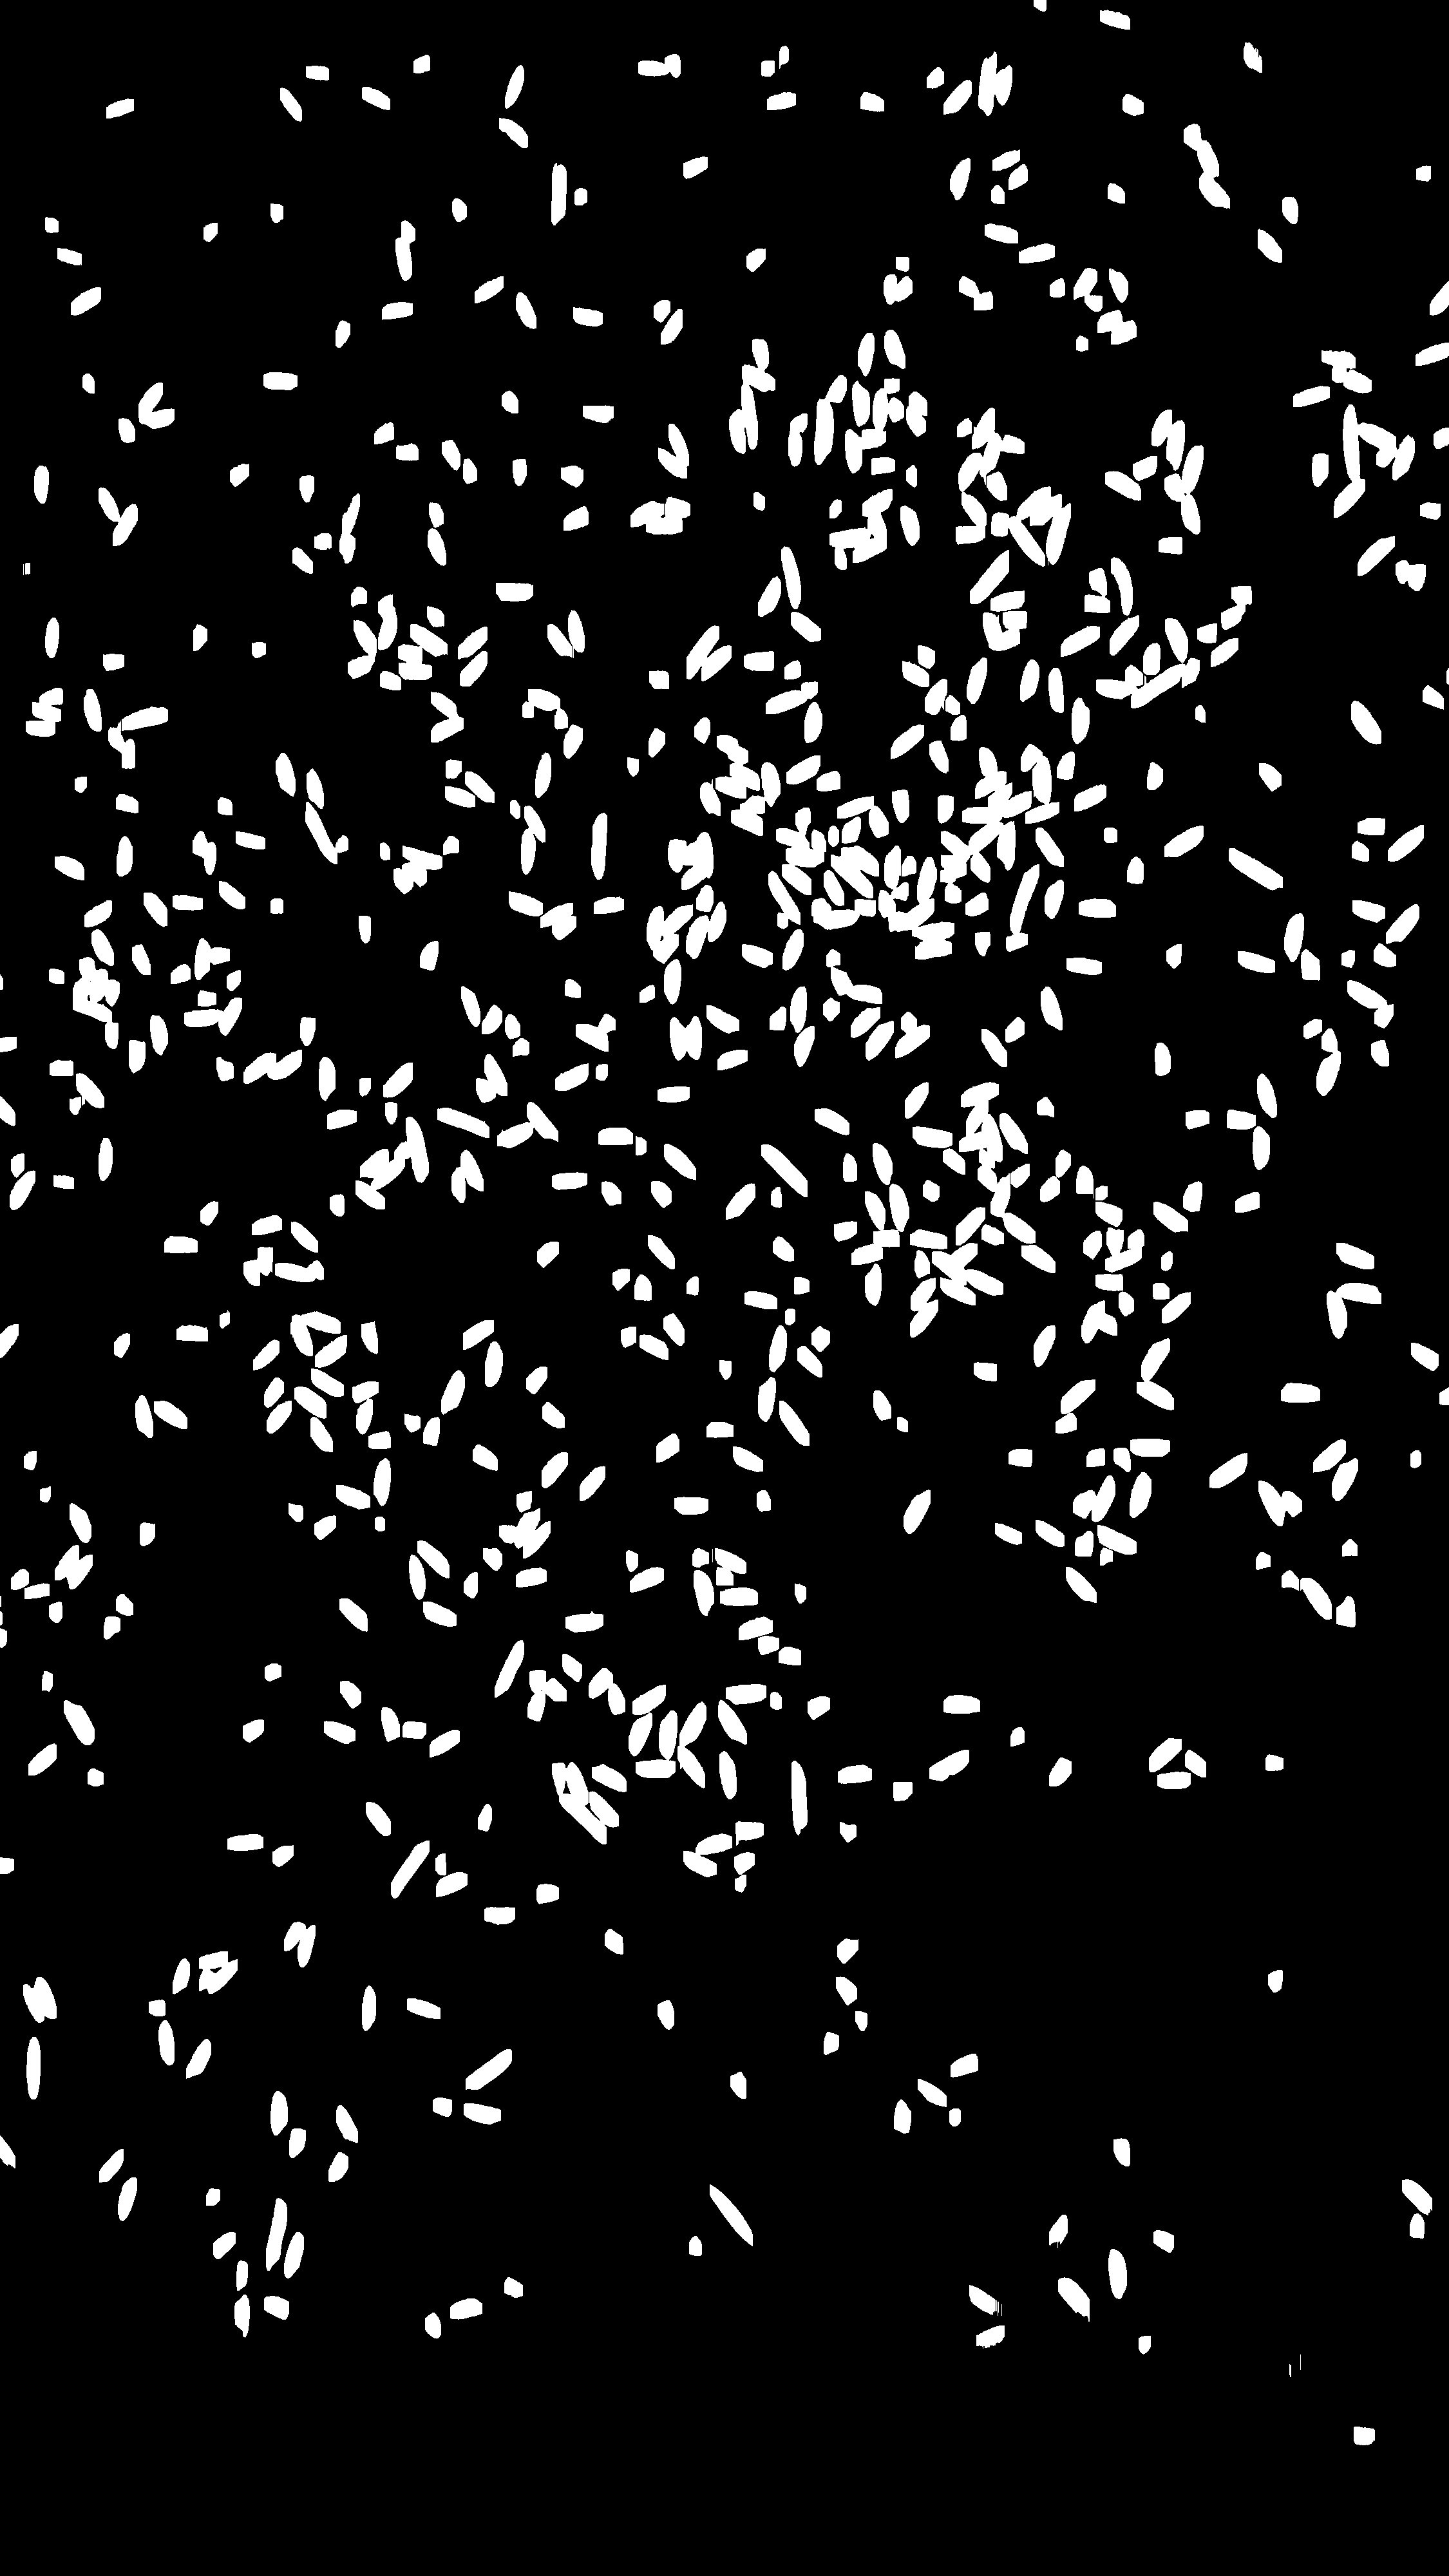

In [28]:
cv2_imshow(output_contour4)
plt.show()

In [29]:
#Applying Countours method to get the count of rice grains of image 5
contours5, hierarchy = cv.findContours(clear_image5, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour5 = cv.cvtColor(clear_image5, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour3, contours5, -1, (0, 0, 255), 2)
print("Number of detected contours in image 5", len(contours5))

Number of detected contours in image 5 509


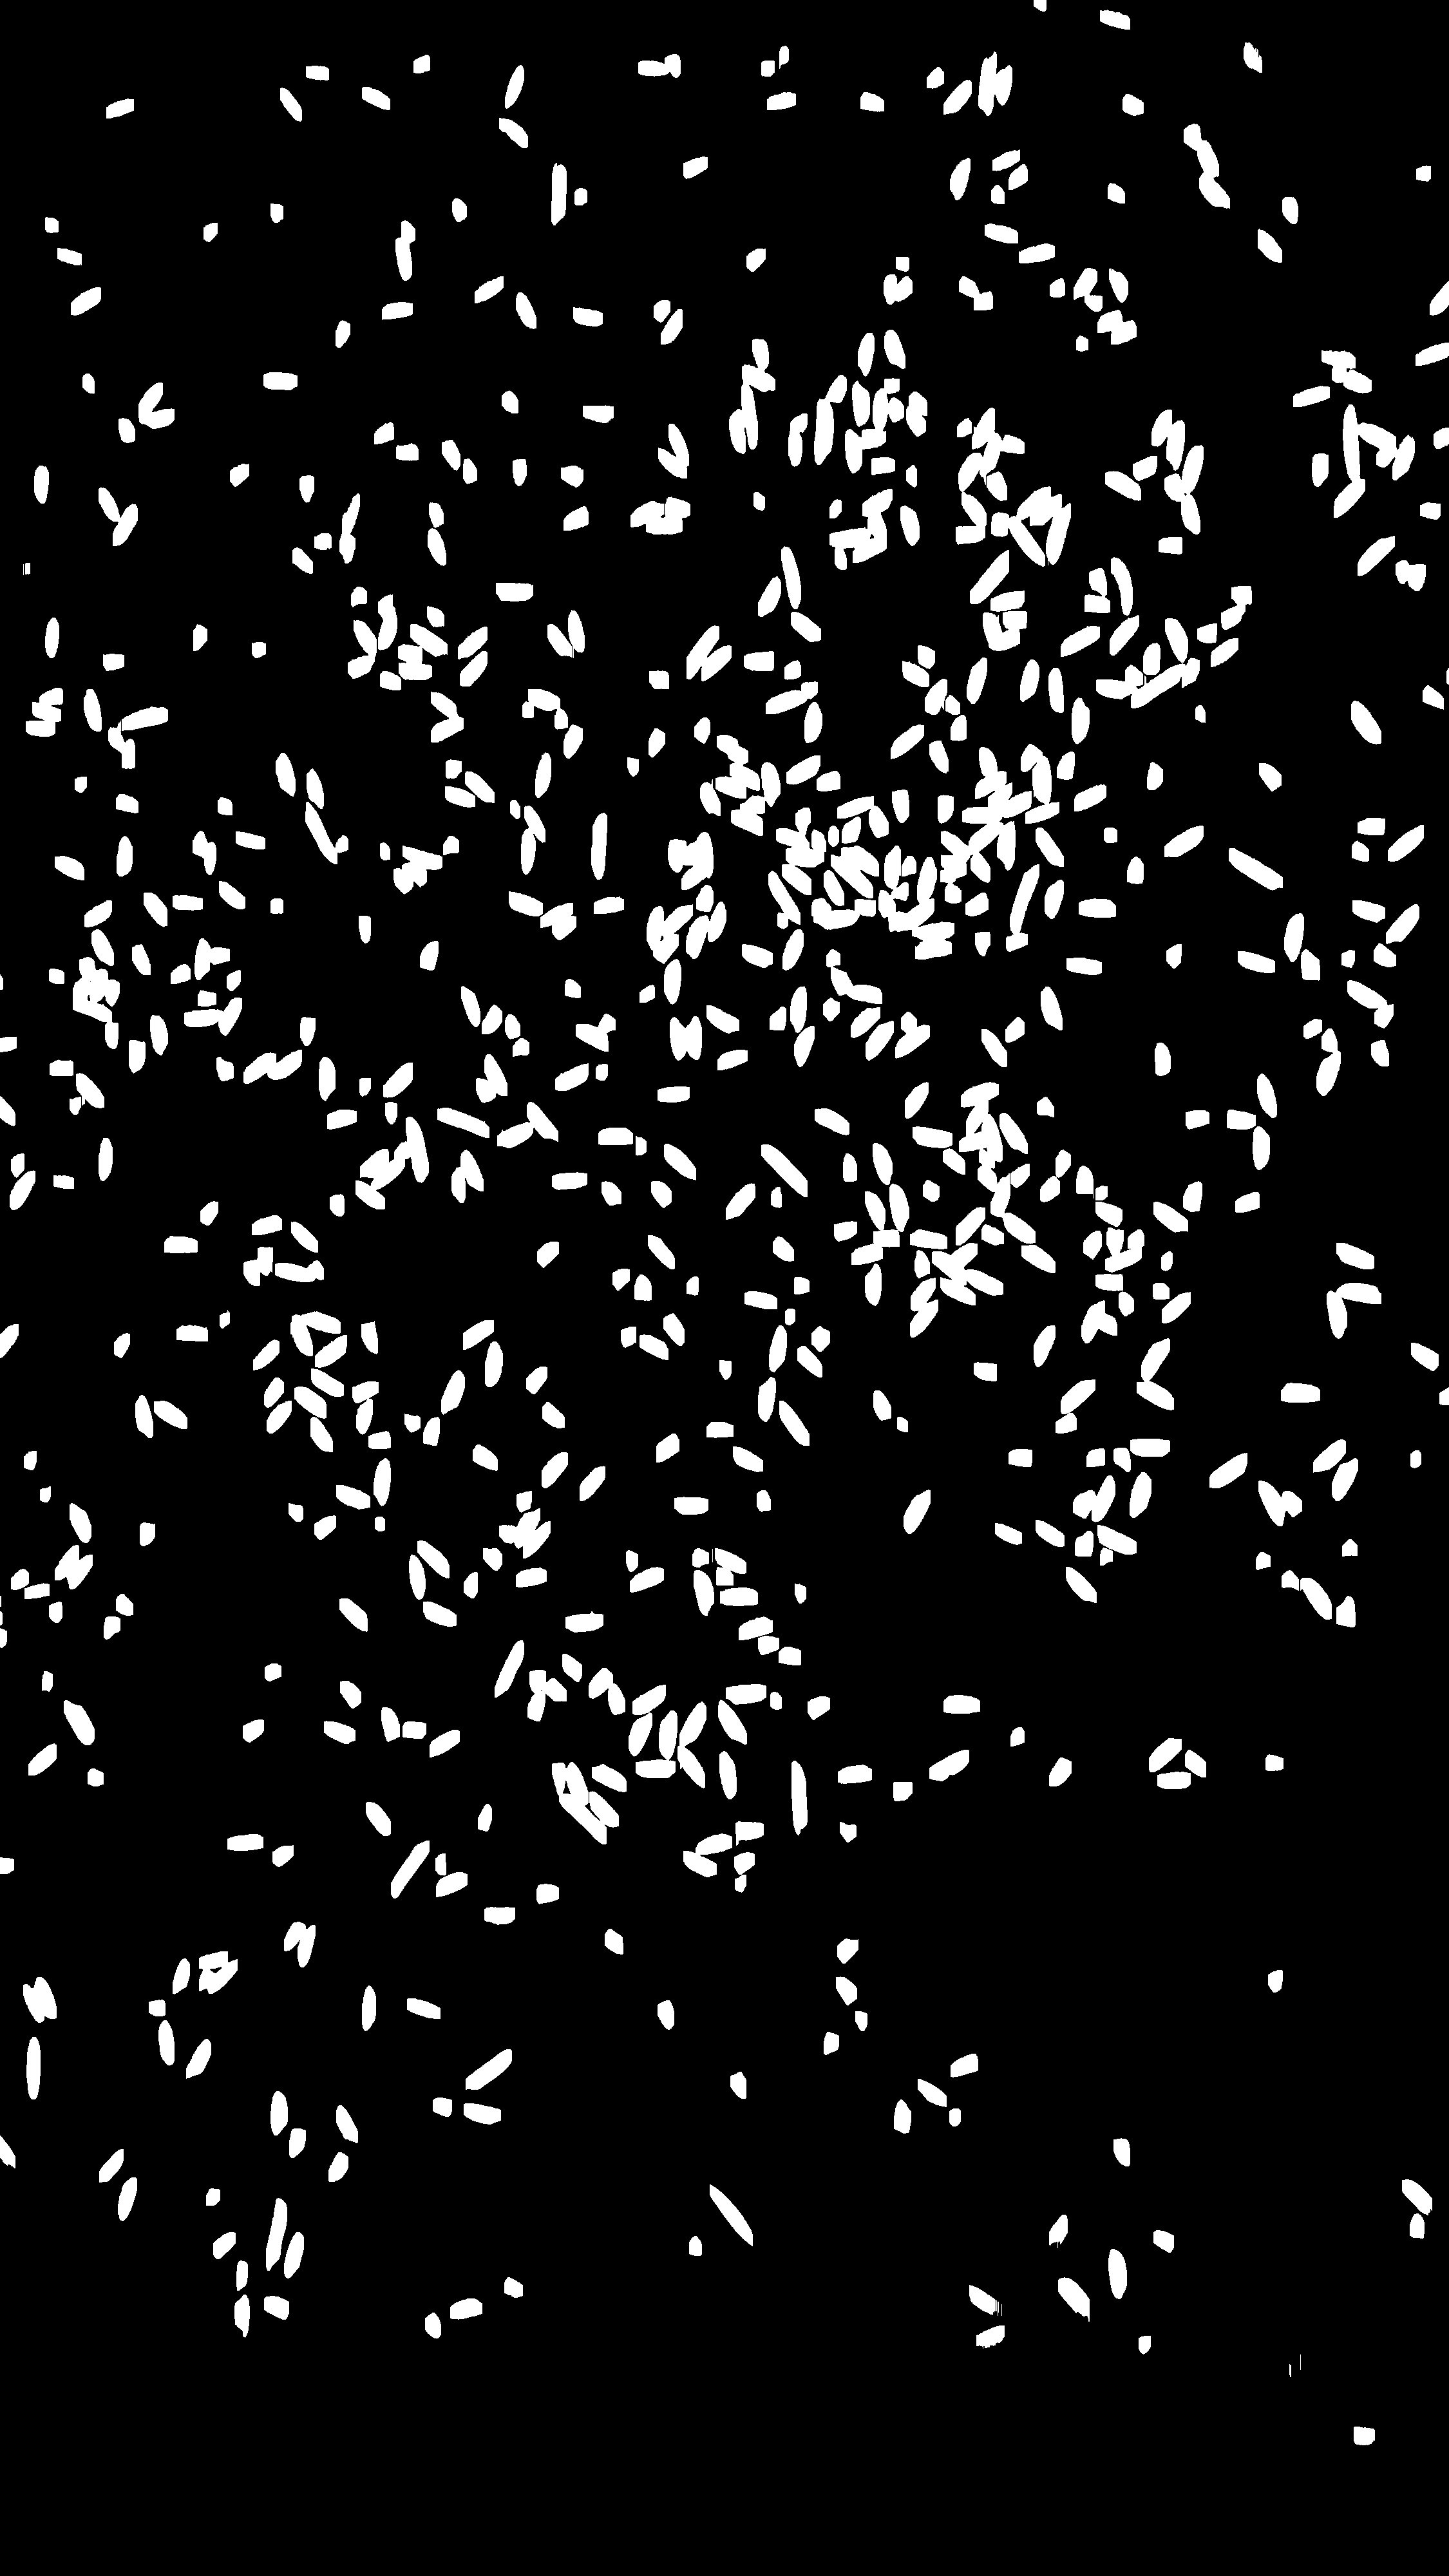

In [30]:
cv2_imshow(output_contour4)
plt.show()

## STEP 5 - Apply Watershed Algorithm 
Fixing rice grains Touching problem with "**WaterShed Algorithm**" \
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. This algorithm generally usefil in detect touching and overlapping objects in image.

In [31]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image1)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels1 = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image1) # separate merged corns

Total Number of Rice grains in image1 : 583


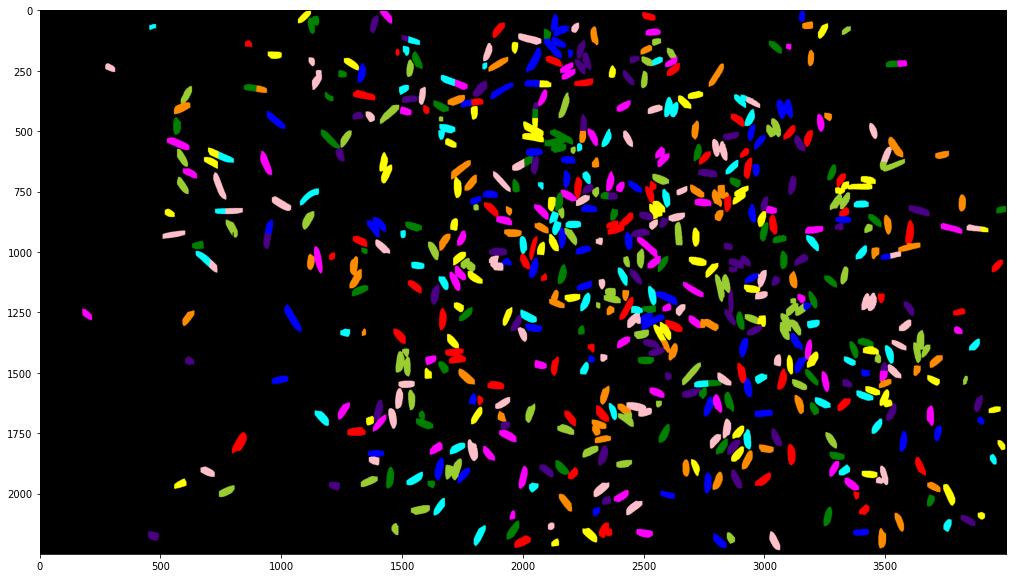

In [32]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels1, bg_label=0))
print("Total Number of Rice grains in image1 : %d" % labels1.max())

In [33]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image2)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels2 = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image2) # separate merged corns

Total Number of Rice grains in image2 : 606


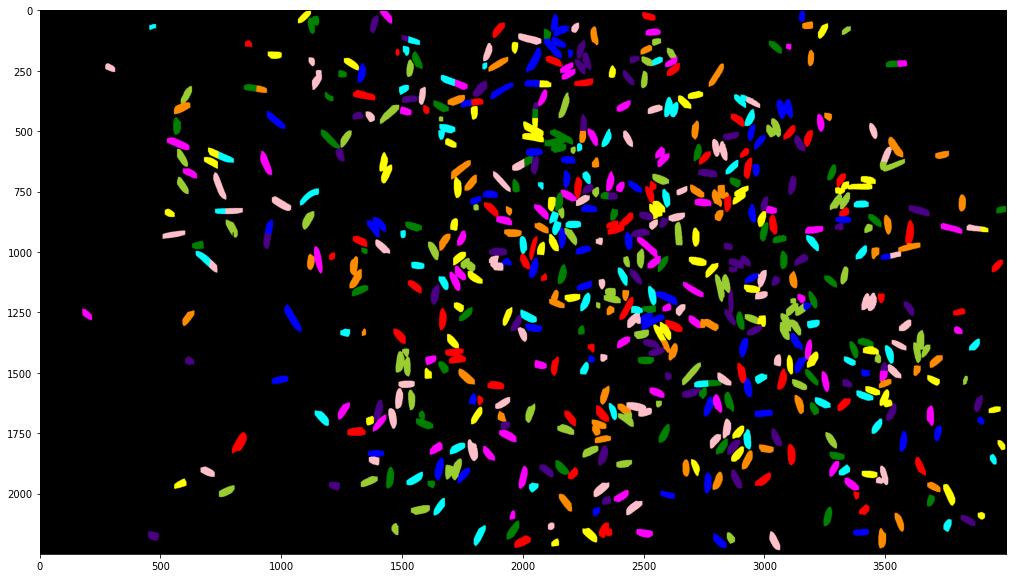

In [34]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels1, bg_label=0))
print("Total Number of Rice grains in image2 : %d" % labels2.max())

In [35]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image3)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels3 = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image3) # separate merged corns

Total Number of Rice grains in image3 : 605


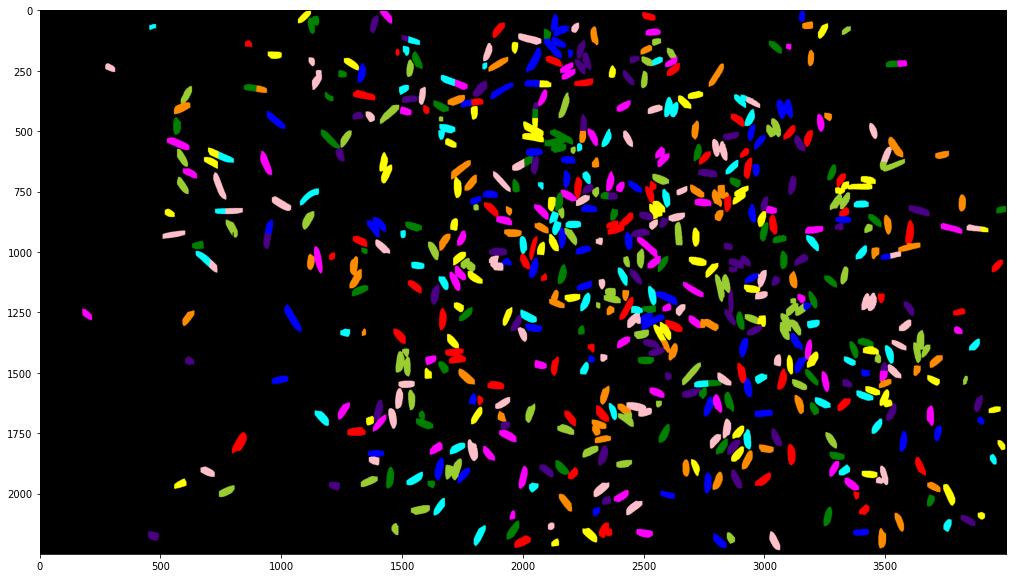

In [36]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels1, bg_label=0))
print("Total Number of Rice grains in image3 : %d" % labels3.max())

In [37]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image4)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels4 = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image4) # separate merged corns

Total Number of Rice grains in image3 : 692


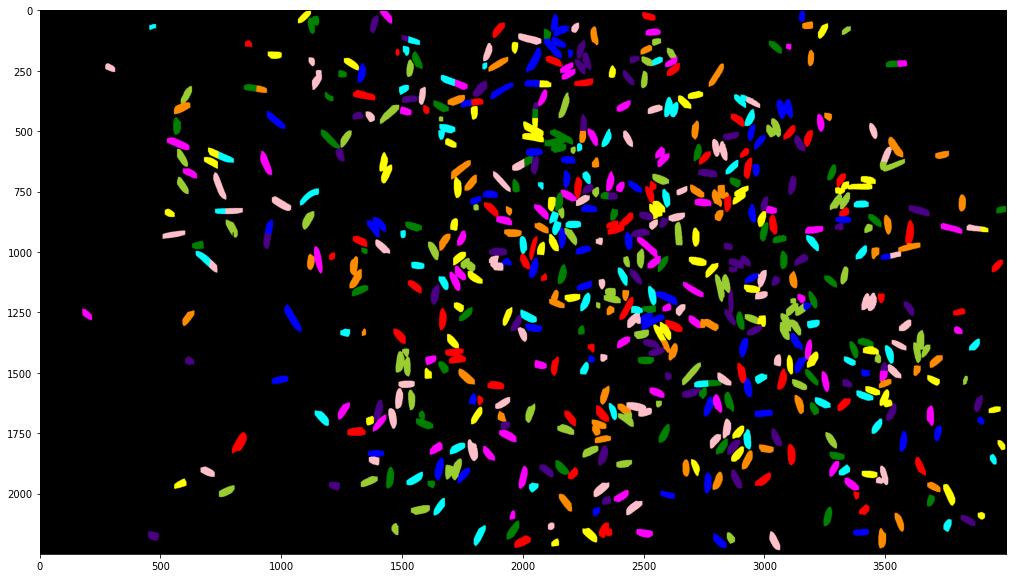

In [38]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels1, bg_label=0))
print("Total Number of Rice grains in image3 : %d" % labels4.max())

In [39]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.


#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image5)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels5 = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image5) # separate merged corns

Total Number of Rice grains in image3 : 698


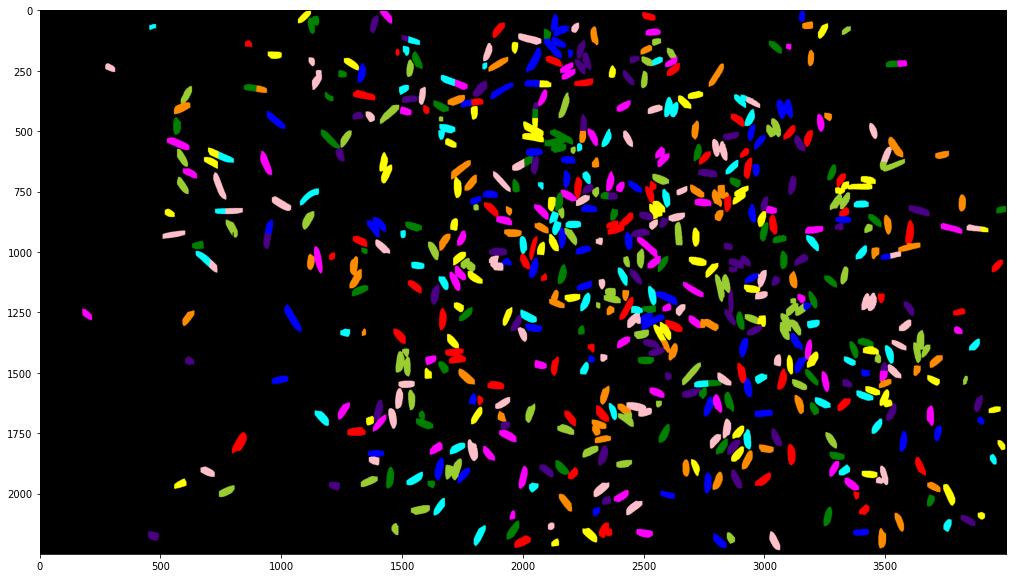

In [40]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels1, bg_label=0))
print("Total Number of Rice grains in image3 : %d" % labels5.max())

### **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In [41]:
list1 = [(len(contours1)),(len(contours2)),(len(contours3)),(len(contours4)),(len(contours5))]
list1

[498, 516, 534, 623, 509]

In [42]:
list2 = [(labels1.max()),(labels2.max()),(labels3.max()),(labels4.max()),(labels5.max())]

In [43]:
import pandas as pd
comparison = pd.DataFrame(list(zip(list1, list2)),
               columns =['Normal_countor', 'countor_using_watershed_algorithm'])

In [44]:
comparison

Normal_countor  countor_using_watershed_algorithm
0             498                                583
1             516                                606
2             534                                605
3             623                                692
4             509                                698

In the above Dataframe we can clearly see the difference between normal coutor and couting after apply the watershed algorithm so , after applying watershed algorithm most of the touching rice are segregrated 


Well, the results are not 100% accurate but it is feasible in respect of Normal countous counting.

### <center> **Objective 1 : Count the Total number of Rice grains completed**

### **Counting Broken Rice**

After Several attempt , I found that area range 800 is the threshold limit for classifing the broken rice grains from the Full rice grains.

Thus use this limit on the contour to get the results.

**Broken rice in image 1**

In [45]:
#Creating A list name count for counting the total Broken rice grains
count1 = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours1:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count1.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image1 is: ",len(count1))

Total number of broken rice present in the Image1 is:  64


**Broken rice in image 2**

In [46]:
#Creating A list name count for counting the total Broken rice grains
count2 = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours2:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count2.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image3 is: ",len(count2))

Total number of broken rice present in the Image3 is:  130


In [47]:
#Creating A list name count for counting the total Broken rice grains
count3 = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours3:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count3.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image3 is: ",len(count3))

Total number of broken rice present in the Image3 is:  136


In [48]:
#Creating A list name count for counting the total Broken rice grains
count4 = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours4:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count4.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image4 is: ",len(count4))

Total number of broken rice present in the Image4 is:  196


In [49]:
#Creating A list name count for counting the total Broken rice grains
count5 = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours5:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count5.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image4 is: ",len(count5))

Total number of broken rice present in the Image4 is:  60


In [50]:
Broken_rice = [len(count1),len(count2),len(count3),(len(count4)),(len(count5))]

In [51]:
image_list = ['image_1.jpg','image_2.jpg','image_3.jpg','image_4.jpg','image_5.jpg']

In [52]:
import pandas as pd
dataframe = pd.DataFrame(list(zip(image_list ,list2,Broken_rice)),
               columns =['images','Total_rice_grain', 'total_broken_rice_grain'])

In [53]:
dataframe

images  Total_rice_grain  total_broken_rice_grain
0  image_1.jpg               583                       64
1  image_2.jpg               606                      130
2  image_3.jpg               605                      136
3  image_4.jpg               692                      196
4  image_5.jpg               698                       60

In [54]:
dataframe.to_csv('/content/drive/MyDrive/Datasets/Akaike Assignment/Computer_vision Assignment/data/data/submission.csv', index=False)

### **Other approaches for solving this project**

#### **use Neural network for creating the label and segregate all the object**  
I haven’t applied this method as part of the solution, but this method can also be one of the ways to tackle the problem statement.

**what is image annotation ?**

Image annotation for deep learning is mainly done for object detection with more precision. 3D Cuboid Annotation, Semantic Segmentation, and polygon annotation are used to annotate the images using the right tool to make the objects well-defined in the image for neural network analysis in deep learning.


Training a neural network on a custom dataset having well annotated full rice grain and broken rice grains images. we can use  different image annotation technique , 3D Bounding Box, Semantic Segmentation and Polygon Annotation are the leading image annotation techniques that are majorly used to annotate the images for deep learning.

It will give the optimal solution with very less error.
I haven’t applied this as but there is a problem to  find any pre-trained model  or dataset same like this dataset and training the CNN is not easy task. But this method can be taken further to take into consideration. Using R-CNN generate masks for every class.

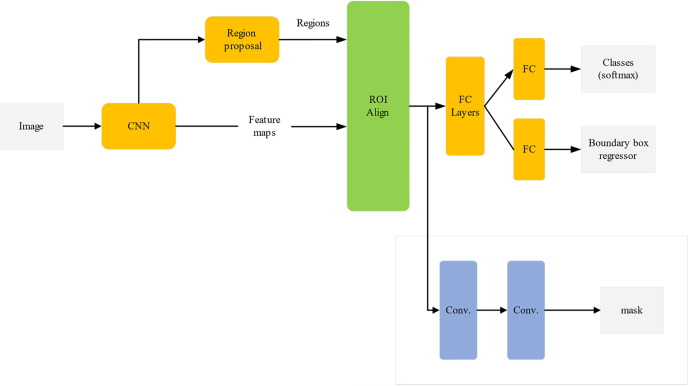

This is a flow diagram of Mask R-CNN model for image segmentation and object detection 



*   After Image annotation using Mask R-CNN we create label and region boundary the we count the lable we get two different label broken rice and Non broken rice the we count the complete rice and then broken rice 
*  **This approach is my future perspective because it will take time lots of preprocessing of images and finding the pretrained moel same like this and tune the model is lenghty task i will implement it later**.



## **Thank you**